In [1]:
# Logistic Regression

In [2]:
import numpy as np
import pandas as pd
iris = pd.read_csv('../data/iris.csv')
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
print(iris.columns.values)

['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']


In [6]:
print(np.unique(iris.species,return_counts=True))

(array(['setosa', 'versicolor', 'virginica'], dtype=object), array([50, 50, 50]))


In [7]:
# check if there are any missing values
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
# convert target variable into numbers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
species = le.fit_transform(iris.species)
print(species)
print(type(species))
print(species.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>
(150,)


In [10]:
np.unique(species,return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

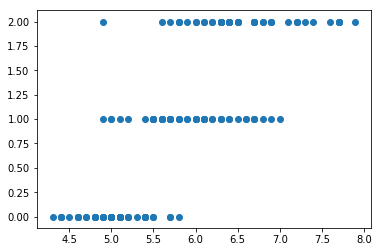

In [12]:
# SepalLength vs species
import matplotlib.pyplot as plt
plt.scatter(iris.sepal_length,
            species)
plt.show()

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
ftest = ols("sepal_length ~ species", data=iris).fit()
anova = sm.stats.anova_lm(ftest)
print(anova)

             df     sum_sq    mean_sq           F        PR(>F)
species     2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual  147.0  38.956200   0.265008         NaN           NaN


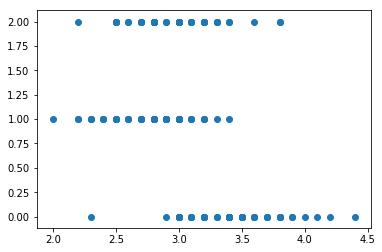

In [15]:
# SepalWidth vs species
import matplotlib.pyplot as plt
plt.scatter(iris.sepal_width,
            species)
plt.show()

In [16]:
# apply anova f-test on sepal length and species
import statsmodels.api as sm
from statsmodels.formula.api import ols
ftest = ols("sepal_width ~ species", data=iris).fit()
anova = sm.stats.anova_lm(ftest)
print(anova)

             df     sum_sq   mean_sq         F        PR(>F)
species     2.0  11.344933  5.672467  49.16004  4.492017e-17
Residual  147.0  16.962000  0.115388       NaN           NaN


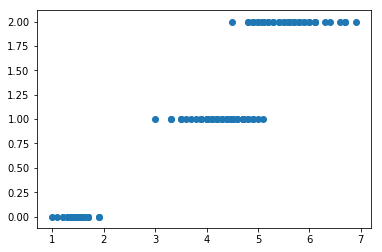

In [17]:
# PetalLength vs species
import matplotlib.pyplot as plt
plt.scatter(iris.petal_length,
            species)
plt.show()

In [19]:
ftest = ols("petal_length ~ species", data=iris).fit()
anova = sm.stats.anova_lm(ftest)
print(anova)

             df    sum_sq     mean_sq            F        PR(>F)
species     2.0  437.1028  218.551400  1180.161182  2.856777e-91
Residual  147.0   27.2226    0.185188          NaN           NaN


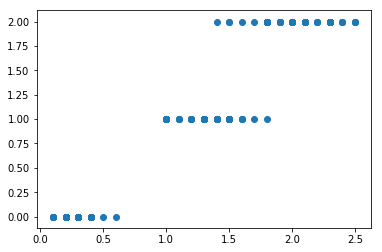

In [20]:
# PetalWidth vs species
import matplotlib.pyplot as plt
plt.scatter(iris.petal_width,
            species)
plt.show()

In [21]:
ftest = ols("petal_width ~ species", data=iris).fit()
anova = sm.stats.anova_lm(ftest)
print(anova)

             df     sum_sq    mean_sq           F        PR(>F)
species     2.0  80.413333  40.206667  960.007147  4.169446e-85
Residual  147.0   6.156600   0.041882         NaN           NaN


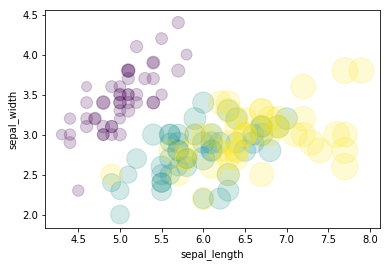

In [22]:
# 4 dimensional plot - 
import matplotlib.pyplot as plt
plt.scatter(iris.sepal_length,
            iris.sepal_width,
            alpha = 0.2,                             # transeperency level
            s = 100*iris.petal_length,                # size of dot depends on petal length
            c = species,                             # colour based on target/species
            cmap = 'viridis')                        # various colour maps present
plt.xlabel(iris.columns.values[0])
plt.ylabel(iris.columns.values[1])
plt.show()

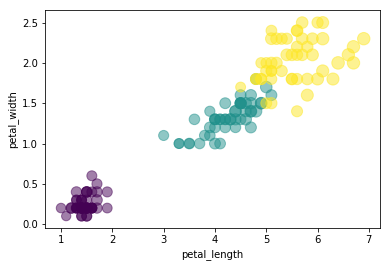

In [23]:
# 4 dimensional plot - 
import matplotlib.pyplot as plt
plt.scatter(iris.petal_length,
            iris.petal_width,
            alpha = 0.5,                             # transeperency level
            s = 20*iris.sepal_length,                # size of dot depends on petal length
            c = species,                             # colour based on target/species
            cmap = 'viridis')                        # various colour maps present
plt.xlabel(iris.columns.values[2])
plt.ylabel(iris.columns.values[3])
plt.show()

In [25]:
# corrleation among independent variables
print(np.corrcoef(iris.sepal_length, iris.sepal_width))
print(np.corrcoef(iris.petal_length, iris.petal_width))
print(np.corrcoef(iris.sepal_length, iris.petal_length))
print(np.corrcoef(iris.sepal_width, iris.petal_width))

[[ 1.         -0.11756978]
 [-0.11756978  1.        ]]
[[1.         0.96286543]
 [0.96286543 1.        ]]
[[1.         0.87175378]
 [0.87175378 1.        ]]
[[ 1.         -0.36612593]
 [-0.36612593  1.        ]]


In [27]:
# split the file into Independent and dependent variables
irisX = pd.DataFrame(iris,columns=['sepal_length','sepal_width',
                                   'petal_length','petal_width'])
irisY = pd.DataFrame(species)
irisY.columns = ["species"]
irisX.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(irisX, irisY,
                                                    test_size = 0.30,
                                                    random_state = 42)
print(type(X_train))
print(type(Y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [29]:
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [30]:
# apply sclaing on continuous variables
from sklearn.preprocessing import StandardScaler
SS = StandardScaler(with_mean = True, with_std = True)
X_train_SS = SS.fit_transform(X_train)
X_test_SS = SS.transform(X_test)

In [31]:
# build logistic model using sklearn
from sklearn.linear_model import LogisticRegression 
# initialize logistic model
lm = LogisticRegression()
# apply linear model without adding any column for constant
logitmodel = lm.fit(X_train_SS, Y_train.species)

In [32]:
print(logitmodel.coef_)
print(logitmodel.intercept_)
print(logitmodel.n_iter_)

[[-0.96199406  1.02756293 -1.74258946 -1.59695772]
 [ 0.48460362 -0.34374465 -0.30072762 -0.66839606]
 [ 0.47739044 -0.68381828  2.04331708  2.26535378]]
[-0.59971404  1.83731854 -1.2376045 ]
[23]


In [33]:
# predict on train & test data
Train_predict = logitmodel.predict(X_train_SS)
print(Train_predict)
Test_predict = logitmodel.predict(X_test_SS)
print((Test_predict))

[1 1 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2 1 1 2 1 0 1 2 0
 0 1 2 0 2 0 0 2 1 2 2 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1
 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0 1 2]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


In [34]:
print(Train_predict[0:5])

[1 1 2 1 2]


In [35]:
logitmodel.predict_proba(X_train)[0:5]

array([[7.27040560e-10, 4.63637876e-04, 9.99536361e-01],
       [3.29908928e-13, 4.63124355e-06, 9.99995369e-01],
       [3.29582063e-14, 8.33459465e-07, 9.99999167e-01],
       [6.28306699e-12, 3.43698810e-05, 9.99965630e-01],
       [1.69358436e-16, 3.12288241e-08, 9.99999969e-01]])

In [36]:
# confusion matrix for train
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_train,Train_predict))
print (classification_report(Y_train,Train_predict))

[[31  0  0]
 [ 0 34  3]
 [ 0  1 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.97      0.92      0.94        37
           2       0.92      0.97      0.95        37

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105



In [37]:
# confusion matrix for test
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,Test_predict))
print (classification_report(Y_test,Test_predict))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [38]:
import pickle
pickle.dump(logitmodel, open('../data/iris.sav', 'wb'))

In [39]:
# make species binary
species[species == 2] = 1
print(species)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


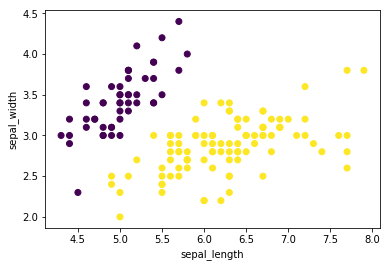

In [40]:
# plot 3 dimensional plot
import matplotlib.pyplot as plt
plt.scatter(iris.sepal_length,
            iris.sepal_width,
            c = species,                             # colour based on target/species
            cmap = 'viridis')                        # various colour maps present
plt.xlabel(iris.columns.values[0])
plt.ylabel(iris.columns.values[1])
plt.show()

In [41]:
# split the file into Independent and dependent variables
irisX = pd.DataFrame(iris,columns=['sepal_length','sepal_width'])
#irisY = pd.DataFrame(species)
irisX.head()
#print(irisY.head())

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [42]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(irisX, species, test_size = 0.30, random_state = 0)
print(type(X_train))
print(type(Y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [43]:
# build logistic model using sklearn
from sklearn import linear_model
# initialize logistic model
lm = linear_model.LogisticRegression()
# apply linear model without adding any column for constant
logitmodel = lm.fit(X_train, Y_train)

In [44]:
print(logitmodel.coef_)
print(logitmodel.intercept_)

[[ 3.07654122 -2.65840403]]
[-8.27261843]


In [46]:
line = (iris.sepal_length * 2.18) - (iris.sepal_width * 3.49)
print(line[0:10])
print(line[45:55])
print(line[140:150])

0   -1.097
1    0.212
2   -0.922
3   -0.791
4   -1.664
5   -1.839
6   -1.838
7   -0.966
8   -0.529
9   -0.137
dtype: float64
45   -0.006
46   -2.144
47   -1.140
48   -1.359
49   -0.617
50    4.092
51    2.784
52    4.223
53    3.963
54    4.398
dtype: float64
140    3.787
141    4.223
142    3.221
143    3.656
144    3.089
145    4.136
146    5.009
147    3.700
148    1.650
149    2.392
dtype: float64


In [47]:
line2 = line
line2[line2 > 0] = 1
line2[line2 < 0] = -1
np.unique(line2,return_counts=True)

(array([-1.,  1.]), array([ 47, 103]))

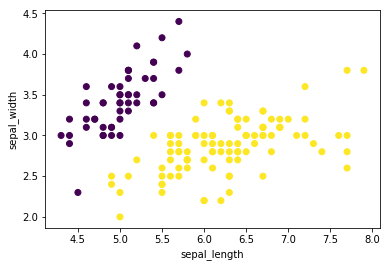

In [48]:
# plot 3 dimensional plot
import matplotlib.pyplot as plt
plt.scatter(iris.sepal_length,
            iris.sepal_width,
            c = species,                             # colour based on target/species
            cmap = 'viridis')                        # various colour maps present
plt.xlabel(iris.columns.values[0])
plt.ylabel(iris.columns.values[1])
plt.show()

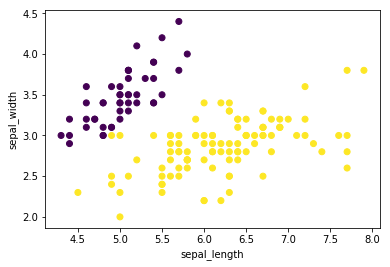

In [49]:
# plot 3 dimensional plot
import matplotlib.pyplot as plt
plt.scatter(iris.sepal_length,
            iris.sepal_width,
            c = line2,                             # colour based on target/species
            cmap = 'viridis')                        # various colour maps present
plt.xlabel(iris.columns.values[0])
plt.ylabel(iris.columns.values[1])
plt.show()